In [1]:
#| label: fig1cell
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.5)
metrics_dir = Path("../data/ukbb_gcn_scaling/flops")

In [70]:
df_flop = pd.DataFrame()
for p in metrics_dir.glob("*.txt"):
    df = pd.read_csv(p, sep="\t")
    exp = pd.DataFrame(df['name'].str.split('-|_', n=-1, expand=True, regex=True).values.reshape(-1, 2).T)
    exp.columns = exp.iloc[0]
    exp.drop(0, inplace=True)
    exp = exp.reset_index(drop=True)
    df = pd.concat([exp, df], axis=1)
    df_metrics = pd.read_csv(str(p).replace('.txt', '_metrics.tsv'), sep="\t")
    df['test_r2'] = df_metrics.loc[df_metrics['metricName'] == 'test/r2', 'metricValue'].values[0]
    df['cpu_percent_avg'] = df_metrics.loc[df_metrics['metricName'] == 'sys.cpu.percent.avg', 'metricValue'].mean()
    df['gpu_used_avg'] = df_metrics.loc[df_metrics['metricName'] == 'sys.gpu.0.used_memory', 'metricValue'].mean()
    df['gpu_used_max'] = df_metrics.loc[df_metrics['metricName'] == 'sys.gpu.0.used_memory', 'metricValue'].max()
    df['sys_load_avg'] = df_metrics.loc[df_metrics['metricName'] == 'sys.load.avg', 'metricValue'].mean()
    df['ram_used_max'] = df_metrics.loc[df_metrics['metricName'] == 'sys.ram.used', 'metricValue'].max()
    df_flop = pd.concat([df_flop, df])


In [71]:
df_flop

,N,W,GCL,F,K,FCL,M,name,flops,macs,params,test_r2,cpu_percent_avg,gpu_used_avg,gpu_used_max,sys_load_avg,ram_used_max
0,197,16,12,8,3,1,8,N-197_W-16_GCL-12_F-8_K-3_FCL-1_M-8,133745664,62939136,12639,0.178605,27.638664,7.824343e+08,783613952.0,11.648926,1.248831e+11
0,197,16,12,32,3,1,8,N-197_W-16_GCL-12_F-32_K-3_FCL-1_M-8,2755402752,1355612160,66747,0.178745,21.203733,9.749516e+08,976551936.0,9.077944,1.123401e+11
0,197,16,9,32,3,1,8,N-197_W-16_GCL-9_F-32_K-3_FCL-1_M-8,1339272192,658440192,35265,0.188641,27.106415,9.082042e+08,909443072.0,19.436849,4.584919e+10
0,197,16,12,16,3,1,8,N-197_W-16_GCL-12_F-16_K-3_FCL-1_M-8,479910912,232390656,19455,0.160702,19.439602,8.138274e+08,815071232.0,10.211004,9.258086e+10
0,197,16,9,8,3,1,8,N-197_W-16_GCL-9_F-8_K-3_FCL-1_M-8,102881280,48414720,10857,0.176339,19.878333,7.761696e+08,777322496.0,8.801922,1.324233e+11
0,197,16,3,16,3,1,8,N-197_W-16_GCL-3_F-16_K-3_FCL-1_M-8,120431616,58097664,8853,0.168243,30.462879,7.959375e+08,798294016.0,12.834963,9.473424e+10
0,197,16,6,32,3,1,8,N-197_W-16_GCL-6_F-32_K-3_FCL-1_M-8,867228672,426049536,24771,0.184431,26.432965,8.888785e+08,890568704.0,10.825924,1.011678e+11
0,197,16,3,32,3,1,8,N-197_W-16_GCL-3_F-32_K-3_FCL-1_M-8,395185152,193658880,14277,0.173018,24.229147,8.860030e+08,888471552.0,10.422978,6.166041e+10
0,197,16,9,16,3,1,8,N-197_W-16_GCL-9_F-16_K-3_FCL-1_M-8,360084480,174292992,15921,0.182612,17.877976,8.033620e+08,804585472.0,9.474187,4.582074e+10
0,197,16,6,16,3,1,8,N-197_W-16_GCL-6_F-16_K-3_FCL-1_M-8,240258048,116195328,12387,0.178748,82.815217,8.073547e+08,808779776.0,33.642813,8.912622e+10


<Axes: xlabel='flops', ylabel='test_r2'>

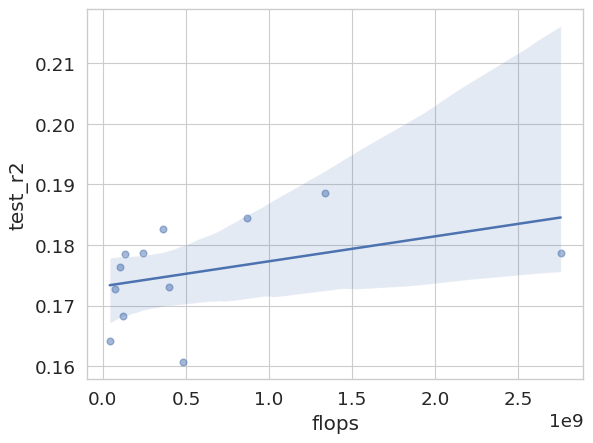

In [75]:
sns.regplot(data=df_flop, x='flops', y='test_r2', scatter_kws={'alpha':0.5})

<Axes: xlabel='params', ylabel='test_r2'>

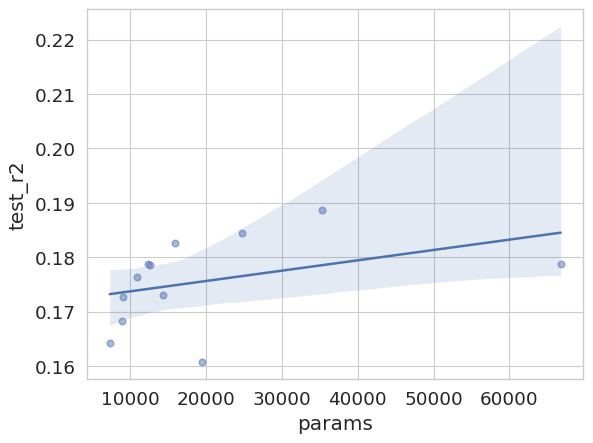

In [76]:
sns.regplot(data=df_flop, x='params', y='test_r2', scatter_kws={'alpha':0.5})